## Random Forest Classification


### Random Forest
#### The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average. 

#### Pros 
- can handle large datasets 
- can handle missing values
- less influenced by outliers in the data
- no assumptions about underlying distributions in the data
- can implicitly handle collinearity in features, highly similar features 
- work well with categorical and numerical features, mixing different range values 

#### Cons
- robust algorithm makes it more complex tougher to analyze small details 
- not best to determine feature and target relationships/effects due to working with highly similar features

### Model Set Up

#### Steps
 - load the data
 - determine regression or classification target
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build the model, fit on the data, run the model
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Regression Models

#### Random Forest Classification 
1 dependent variable (binary) , 1+ independent variables (interval or ratio or categorical)
 - classification predictor
 - generate reasonable predictions across a wide range of data while requiring little configuration



#### Classification Models


##### Import + Inspect

In [ ]:
### imports ###
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/CS_Notes/main/Classification_Notes/bill_authentication.csv') # read in the file 
print('data frame shape:', df.shape) # show the data frame shape 
df.head() # show the data frame 

data frame shape: (1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns) 
print('--- types --- ')
print(df.dtypes) 
print('--- NA counts --- ')
print(df.isna().sum()) 
# print('--- object descriptions --- ')
# print(df.describe(include=object))
print('--- numericals descriptions --- ')
df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')
--- types --- 
Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object
--- NA counts --- 
Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64
--- numericals descriptions --- 


,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


--- feature correlations heatmap ---


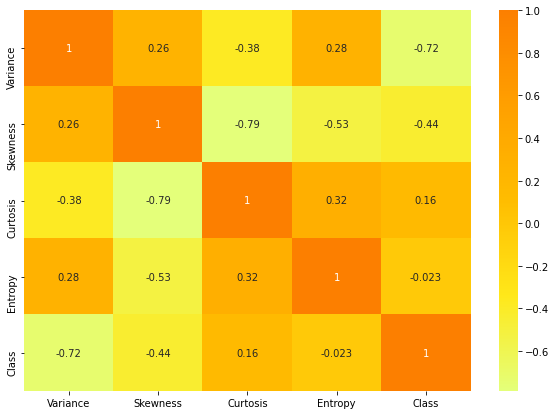

In [ ]:
### view basic feature correlations in a heatmap ###
import seaborn as sns 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1, 1, figsize = (10, 7))
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

--- bar plots ---


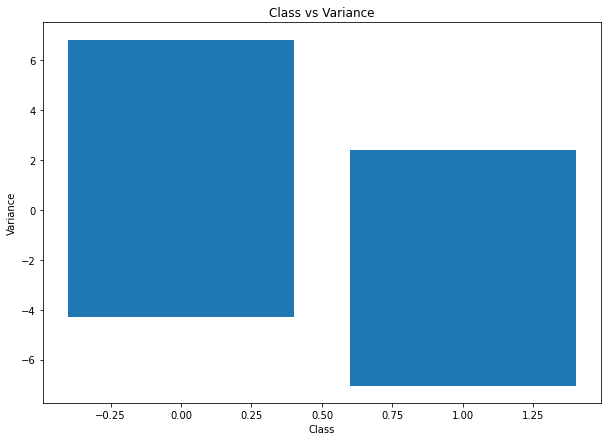

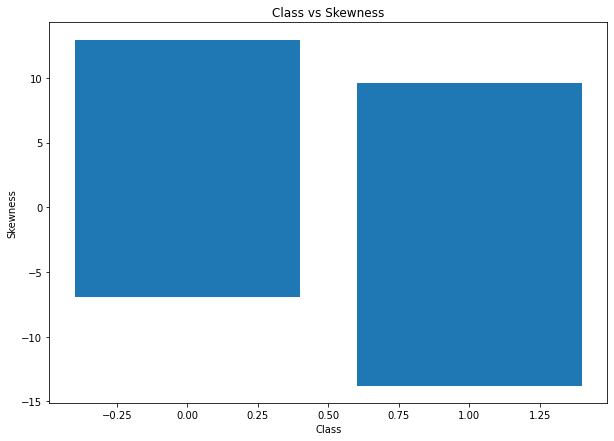

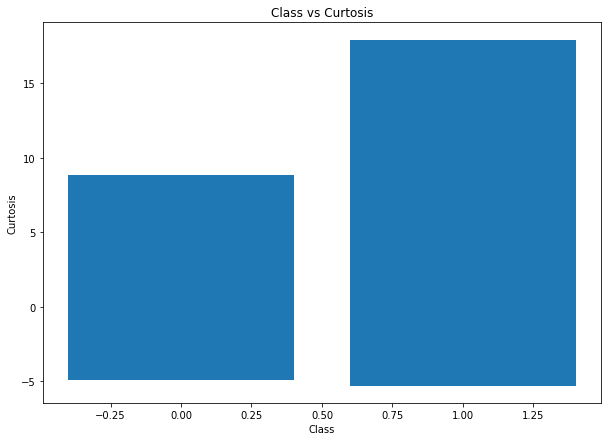

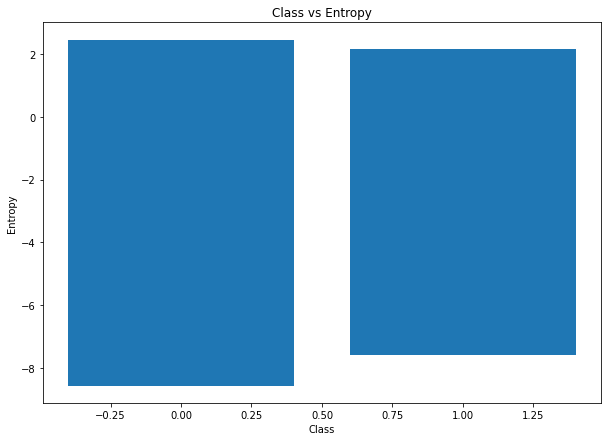

In [ ]:
### view scatter plots for each feature vs. target ###
import matplotlib.pyplot as plt 
target_ = 'Class' # set the target
features_ = df.iloc[:, 0:4] # set the features
print('--- bar plots ---')
for feature in features_:
    figure = plt.figure
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    ax = plt.gca()
    ax.bar(df[target_], df[feature])
    ax.set_xlabel(target_)
    ax.set_ylabel(feature)
    ax.set_title(f'''{target_} vs {feature}''')
    plt.show()

##### Encode + Clean + Organize




In [ ]:
### encoding not necessary with this example, all are numericals ###

<Figure size 432x288 with 0 Axes>

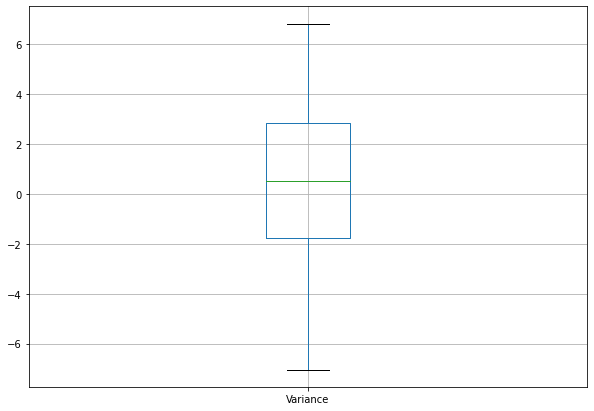

<Figure size 432x288 with 0 Axes>

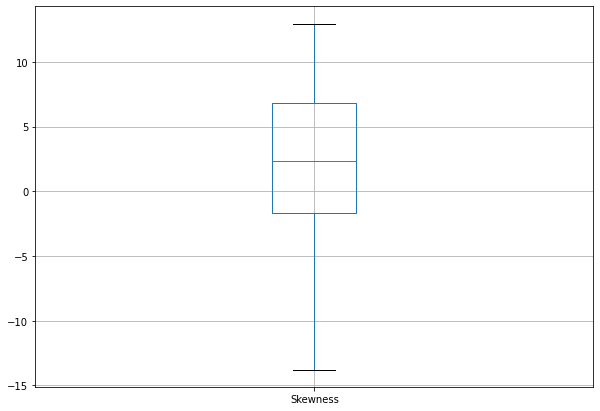

<Figure size 432x288 with 0 Axes>

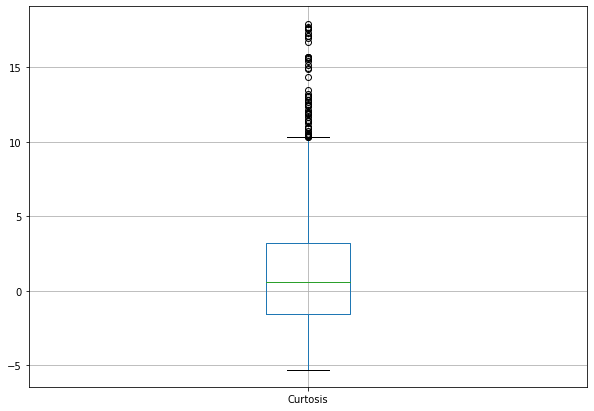

<Figure size 432x288 with 0 Axes>

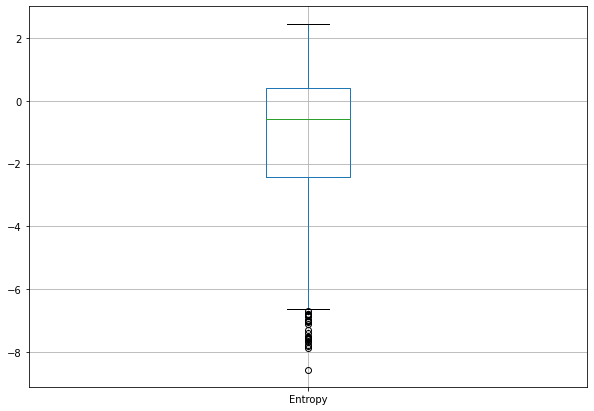

<Figure size 432x288 with 0 Axes>

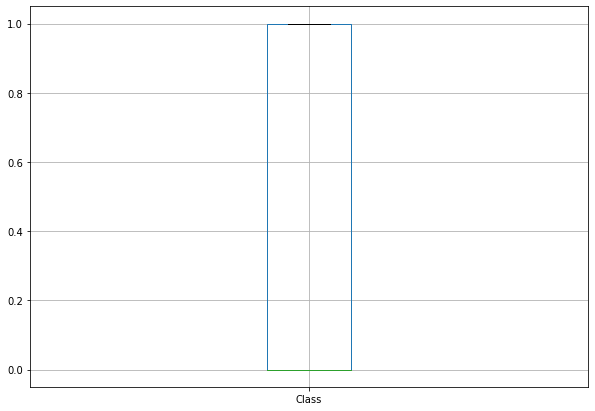

In [ ]:
### check for outliers in the data ### 
import matplotlib.pyplot as plt
# view each feature in a boxplot 
for column in df:
    plt.figure() # plot figure 
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    df.boxplot([column]) # set data

In [ ]:
### function to find outliers in the data ###
def outlier_zscore(data):
    global outliers,zscore
    outliers = [] 
    zscore = [] 
    threshold = 3.5 # set threshold 
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std # calculate the z_score
        zscore.append(z_score) # append the score to the zscore
        if np.abs(z_score) > threshold: 
            outliers.append(i) # append z_score the outliers
    print(outliers)
    return len(outliers), outliers

In [ ]:
### run each feature 'wanted' through the function ### 
print('--- possible outliers --- ')
Variance_outliers_number, Variance_outliers = outlier_zscore(df.Variance)
Skewness_outliers_number, Skewness_outliers = outlier_zscore(df.Skewness)
Curtosis_outliers_number, Curtosis_outliers = outlier_zscore(df.Curtosis)
Entropy_outliers_number, Entropy_outliers = outlier_zscore(df.Entropy)
Class_outliers_number, Class_outliers = outlier_zscore(df.Class)

--- possible outliers --- 
[]
[]
[]
[]
[]


In [ ]:
### removal of outliers per feature ###
for num, i in enumerate(df['Curtosis']): # removing the outliers of 'bmi' 
    if i in Curtosis_outliers:
        df['Curtosis'][num] = 13.5 # 3.5 under the lowest outlier
for num, i in enumerate(df['Entropy']): # removing the outliers of 'charges'
    if i in Entropy_outliers:
        df['Entropy'][num] = -5.5 # 3.5 under the lowest outlier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### Random Forest Classification
 - GridSearch CV
 - RandomSearch CV

In [ ]:
### copy the data frame ### 
df1 = df.copy()

In [ ]:
### split the data into features & target sets ###
X = df1.iloc[:, 0:4].values # set the features
y = df1.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1372, 4)
y shape: (1372,)


In [ ]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [ ]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [ ]:
### random forest classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---')
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score = {}".format(score)) # show the r2 score
print('model score=', model.score(X_train, y_train)) # show the model score 
print("model accuracy= {}%".format(score * 100)) # show the model accuracy
print('--- confusion matrix ---')
print(metrics.confusion_matrix(y_test,y_pred)) # confusion matrix
print('--- classification report ---') 
print(metrics.classification_report(y_test,y_pred)) # classificatin report
print('model accuracy score=', metrics.accuracy_score(y_test, y_pred)) # model accuracy

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            1                 1
1            0                 0
2            1                 1
3            0                 0
4            0                 0
--- model metrics ---
mean absolute error: 0.014545454545454545
mean squared error: 0.014545454545454545
root mean squared error: 0.12060453783110545
r2 score = 0.9406239879088848
model score= 1.0
model accuracy= 94.06239879088848%
--- confusion matrix ---
[[155   2]
 [  2 116]]
--- classification report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

model accuracy score= 0.9854545454545455


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


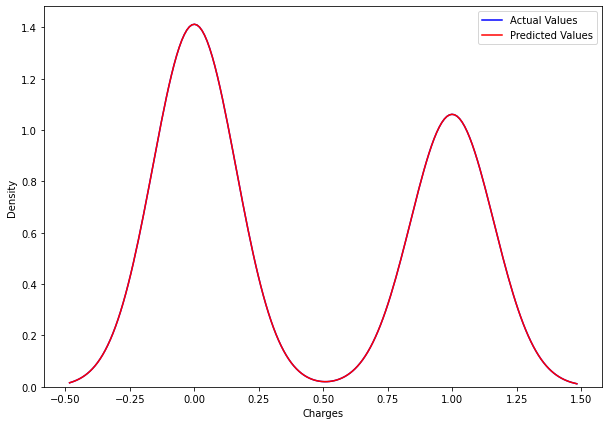

In [ ]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

###### GridSearch CV

In [ ]:
### copy the data frame ###
df2 = df.copy()

In [ ]:
### split the data into features & target sets ###
# for single regression select 1 feature
X = df2.iloc[:, 0:4].values # set the features
y = df2.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1372, 4)
y shape: (1372,)


In [ ]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [ ]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [ ]:
### random forest classifier + gridsearch CV model ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model1 = RandomForestClassifier()
param_grid = {  # create the param grid 
            'n_estimators': [20, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes' : [2, 6, 10],
            'max_depth' : [5, 15, 25],
            'min_samples_split' : [2, 10, 15],
            # 'bootstrap': [True, False],
            # 'ccp_alpha': [0.0, 0.25, 0.50],
            # 'criterion': 'mse',
            # 'max_samples': [2, 10, 15],
            # 'min_impurity_decrease': [0.0, 0.25, 0.50],
            # 'min_impurity_split': [2, 10, 15],
            # 'min_samples_leaf': [1, 5, 10],
            # 'min_weight_fraction_leaf': [0.0, 0.25, 0.50],
            # 'n_jobs': [1, 2, 5],
            # 'oob_score': [True, False],
            # 'random_state': [0, 2, 4],
            # 'verbose': [1],
            # 'warm_start': [True, False] 
              }
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 2min 10s, sys: 501 ms, total: 2min 11s
Wall time: 2min 11s
--- best params --- 


{'max_depth': 25,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_split': 2,
 'n_estimators': 20}

In [ ]:
### random forest classifier + grid best params ###
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model1 = RandomForestClassifier(
                                max_depth= 25,
                                max_features= 'log2',
                                max_leaf_nodes= 10,
                                min_samples_split= 2,
                                n_estimators= 20
                                )
print('--- model runtime --- ')
%time model1.fit(X_train, y_train)
y_pred = model1.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model1 metrics ###
print('--- model metrics ---')
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score = {}".format(score)) # show the r2 score
print('model score=', model1.score(X_train, y_train)) # show the model score 
print("model accuracy= {}%".format(score * 100)) # show the model accuracy
print('--- confusion matrix ---')
print(metrics.confusion_matrix(y_test,y_pred)) # confusion matrix
print('--- classification report ---') 
print(metrics.classification_report(y_test,y_pred)) # classificatin report
print('model1 accuracy score=', metrics.accuracy_score(y_test, y_pred)) # model accuracy

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            1                 1
1            0                 0
2            1                 1
3            0                 0
4            0                 0
--- model metrics ---
mean absolute error: 0.03272727272727273
mean squared error: 0.03272727272727273
root mean squared error: 0.18090680674665818
r2 score = 0.8664039727949908
model score= 0.9790337283500455
model accuracy= 86.64039727949908%
--- confusion matrix ---
[[150   7]
 [  2 116]]
--- classification report ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       157
           1       0.94      0.98      0.96       118

    accuracy                           0.97       275
   macro avg       0.96      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

model1 accuracy score= 0.9672727272727273


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


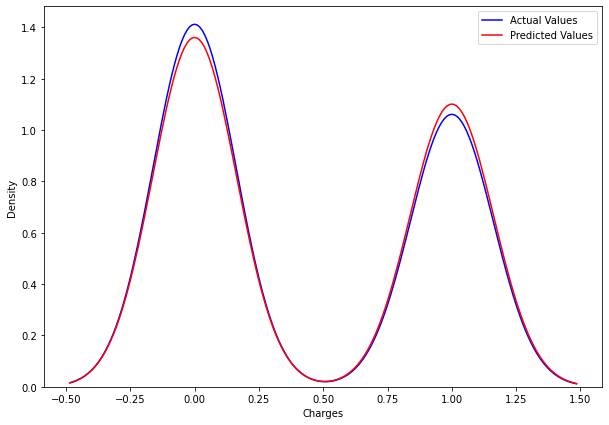

In [ ]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

###### RandomSearch CV

In [ ]:
### copy the data frame ###
df3 = df.copy()

In [ ]:
### split the data into features & target sets ###
# for single regression select the 1 feature
X = df3.iloc[:, 0:4].values # set the features
y = df3.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) # show the shape 
print('y shape:', y.shape) # show the shape 

--- data shapes --- 
X shape: (1372, 4)
y shape: (1372,)


In [ ]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20

In [ ]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [ ]:
### random forest classifier + randomizedsearch CV model ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
model2 = RandomForestClassifier()
param_grid = {  # create the param grid 
            'n_estimators': [20, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes' : [2, 6, 10],
            'max_depth' : [5, 15, 25],
            'min_samples_split' : [2, 10, 15],
            # 'bootstrap': [True, False],
            # 'ccp_alpha': [0.0, 0.25, 0.50],
            # 'criterion': 'mse',
            # 'max_samples': [2, 10, 15],
            # 'min_impurity_decrease': [0.0, 0.25, 0.50],
            # 'min_impurity_split': [2, 10, 15],
            # 'min_samples_leaf': [1, 5, 10],
            # 'min_weight_fraction_leaf': [0.0, 0.25, 0.50],
            # 'n_jobs': [1, 2, 5],
            # 'oob_score': [True, False],
            # 'random_state': [0, 2, 4],
            # 'verbose': [1],
            # 'warm_start': [True, False] 
              }
CV_rfc = RandomizedSearchCV(model2, param_grid, cv=3) 
%time CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

CPU times: user 3.64 s, sys: 19 ms, total: 3.66 s
Wall time: 3.67 s


{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_split': 15,
 'n_estimators': 20}

In [ ]:
### random forest classifier + random best params ###
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model2 = RandomForestClassifier(
                                max_depth= 15,
                                max_features= 'auto',
                                max_leaf_nodes= 10,
                                min_samples_split= 15,
                                n_estimators= 20
                                )
print('--- model runtime --- ')
%time model2.fit(X_train, y_train)
y_pred = model2.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model2 metrics ###
print('--- model metrics ---')
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score = {}".format(score)) # show the r2 score
print('model score=', model2.score(X_train, y_train)) # show the model score 
print("model accuracy= {}%".format(score * 100)) # show the model accuracy
print('--- confusion matrix ---')
print(metrics.confusion_matrix(y_test,y_pred)) # confusion matrix
print('--- classification report ---') 
print(metrics.classification_report(y_test,y_pred)) # classificatin report
print('model2 accuracy score=', metrics.accuracy_score(y_test, y_pred)) # model accuracy

--- model runtime --- 
CPU times: user 45.8 ms, sys: 998 µs, total: 46.8 ms
Wall time: 48.1 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            1                 1
1            0                 0
2            1                 1
3            0                 0
4            0                 0
--- model metrics ---
mean absolute error: 0.03272727272727273
mean squared error: 0.03272727272727273
root mean squared error: 0.18090680674665818
r2 score = 0.8664039727949908
model score= 0.9781221513217867
model accuracy= 86.64039727949908%
--- confusion matrix ---
[[150   7]
 [  2 116]]
--- classification report ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       157
           1       0.94      0.98      0.96       118

    accuracy                           0.97       275
   macro avg       0.96      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

model2 accuracy s

--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


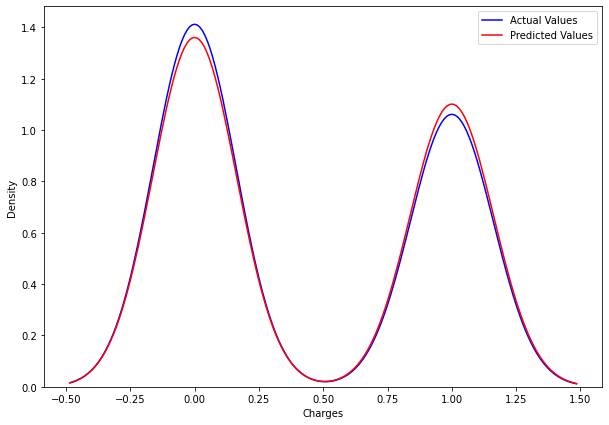

In [ ]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()